 # Inventory Analysis
PwC has developed this case study for university classrooms to enhance students' comprehension of data analytics, focusing on utilizing analytics for business decision-making. By completing this case study, one will achieve the following:

* Gain a solid understanding of data analytics and visualization.
* Develop the ability to use analytic tools effectively.
* Feel comfortable leveraging data for decision-making.
* Acquire skills in selecting data components for analysis and presenting results, emphasizing data tracking, exception analysis, and business advisory strategies.



### Objectives:

1. **Minimization of Waste through Inventory Optimization:**
   - Implement strategies to minimize waste by optimizing inventory levels.
   - Utilize sales, procurement, and inventory data to identify the most effective purchasing strategies.

2. **Data Preprocessing for Comprehensive Analysis:**
   - Consolidate all CSV files into a unified master dataset to facilitate a comprehensive analysis.
   - Conduct thorough screening for any missing or erroneous entries.
   - Standardize date formats to ensure consistency for more accurate time series analysis.

3. **In-Depth Inventory Analysis:**
   - Utilize BegInvFINAL12312016.csv and EndInvFINAL12312016.csv to assess inventory status at the beginning and end of the year.
   - Identify products with the highest and lowest inventory levels, offering a nuanced understanding of inventory presence.

4. **Sales Analysis for Informed Decision-Making:**
   - Scrutinize SalesFINAL12312016.csv to identify best-selling products and those experiencing sluggish sales.
   - Analyze sales trends over time, considering variables such as sales quantity, sales price, and date.

5. **Comprehensive Purchasing Analysis:**
   - Evaluate procurement activities through an in-depth examination of PurchasesFINAL12312016.csv and InvoicePurchases12312016.csv.
   - Investigate purchase volumes from various suppliers, procurement costs, and overall supply chain processes.

6. **Optimal Stock Level Calculation for Precision:**
   - Determine the optimal stock level for each product by leveraging insights from sales, procurement, and inventory data.
   - Propose tailored stock levels that align with the sales velocity of products and consider supply lead times for enhanced precision.





In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
purchase_prices= pd.read_csv("2017PurchasePricesDec.csv")
beg_inv= pd.read_csv("BegInvFINAL12312016.csv")
end_inv=pd.read_csv("EndInvFINAL12312016.csv")
invoice_purchase=pd.read_csv("InvoicePurchases12312016.csv")
purchases=pd.read_csv("PurchasesFINAL12312016.csv")
sales=pd.read_csv("SalesFINAL12312016.csv")

In [3]:
print("purchase_prices Columns:")
print(purchase_prices.columns.tolist())

print("\nbeg_inv Columns:")
print(beg_inv.columns.tolist())

print("\nend_inv Columns:")
print(end_inv.columns.tolist())

print("\ninvoice_purchase Columns:")
print(invoice_purchase.columns.tolist())

print("\npurchases Columns:")
print(purchases.columns.tolist())

print("\nsales Columns:")
print(sales.columns.tolist())

purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beg_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

end_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchase Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


In [4]:
# Checking for missing data in each dataset
datasets = [purchase_prices, beg_inv, end_inv, invoice_purchase, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchase", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]
    
    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)


Missing values in purchase_prices:
Description    1
Size           1
Volume         1
dtype: int64

Missing values in end_inv:
City    1284
dtype: int64

Missing values in purchases:
Size    3
dtype: int64


In [5]:
# Handling missing values for purchase_prices dataset

purchase_prices.dropna(subset=["Description"], inplace=True)
purchase_prices.dropna(subset=["Size"], inplace=True)
purchase_prices.dropna(subset=["Volume"], inplace=True)


In [6]:
# Handling missing values for end_inv dataset
if end_inv['Store'].nunique() == end_inv['City'].nunique():
    city_store_mapping = end_inv[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City']
    end_inv['City'] = end_inv['City'].fillna(end_inv['Store'].map(city_store_mapping))
else:
    end_inv['City'].fillna('Unknown', inplace=True)

In [7]:

# Handling missing values for purchase dataset
purchases = purchases[purchases['Size'].notna()]




# 1. Inventory Annalysis

In [8]:
# Grouping by Brand and Description and summarize inventory for beginning of the year
beg_summary = beg_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Grouping by Brand and Description and summarize inventory for end of the year
end_summary = end_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Identifying top 5 products at the beginning and end of the year
top_5_beg = beg_summary.head(5)
top_5_end = end_summary.head(5)

# Identifying bottom 5 products at the beginning and end of the year
bottom_5_beg = beg_summary.tail(5)
bottom_5_end = end_summary.tail(5)

In [9]:
print("Top 5 products at the beginning of the year:\n", top_5_beg)
print("\nTop 5 products at the end of the year:\n", top_5_end)
print("\nBottom 5 products at the beginning of the year:\n", bottom_5_beg)
print("\nBottom 5 products at the end of the year:\n", bottom_5_end)

Top 5 products at the beginning of the year:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Top 5 products at the end of the year:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Bottom 5 products at the beginning of the year:
 Brand  Description                 
42676  Kistler Chard Sonma Mountain    0
34693  Valley of the Moon Chard        0
42710  Pommery Pink Pop Rose           0
22647  Guillaume Vrignaud Chablis 1    0
21283  J Pierre Chablis Le Forneaux    0
Name: onHand, dtype: int64

Bottom 5 products at the end of the year:
 Brand  Descriptio

# 2. Sales Analysis

In [10]:
# Finding the best-selling products
best_selling_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Best selling ten products:\n{best_selling_products}\n")

# Finding the slow-moving products
slow_moving_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Slow-moving ten products:\n{slow_moving_products}")

Best selling ten products:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189

Slow-moving ten products:
                                    SalesQuantity
Brand Description                                
25727 Chappellet Cab Svgn Pritchrd              1
23110 Duckhorn Estates Merlot                   1
2505  Bowmore Legend Single Malt                1
1043  Jim Beam Gift Pak                         1
23109 DeLille Cellars Chaleur Blnc            

<Axes: title={'center': 'Sales Quantity Over Time'}, xlabel='SalesDate'>

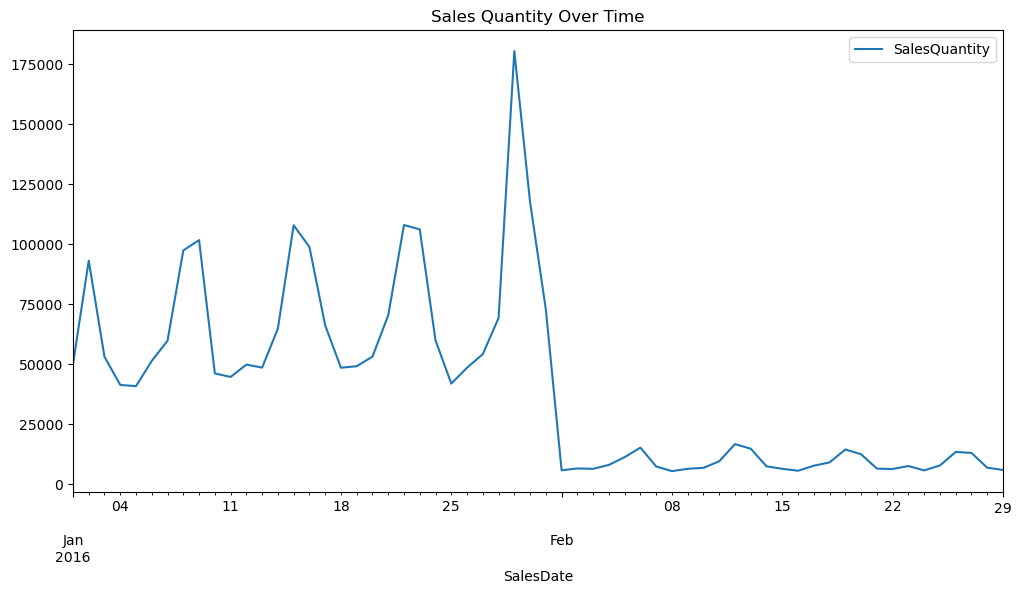

In [11]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales_quantity_trend = sales.groupby('SalesDate').agg({'SalesQuantity': 'sum'})
sales_quantity_trend.plot(figsize=(12, 6), title='Sales Quantity Over Time')

<Axes: title={'center': 'Average Sales Price Over Time'}, xlabel='SalesDate'>

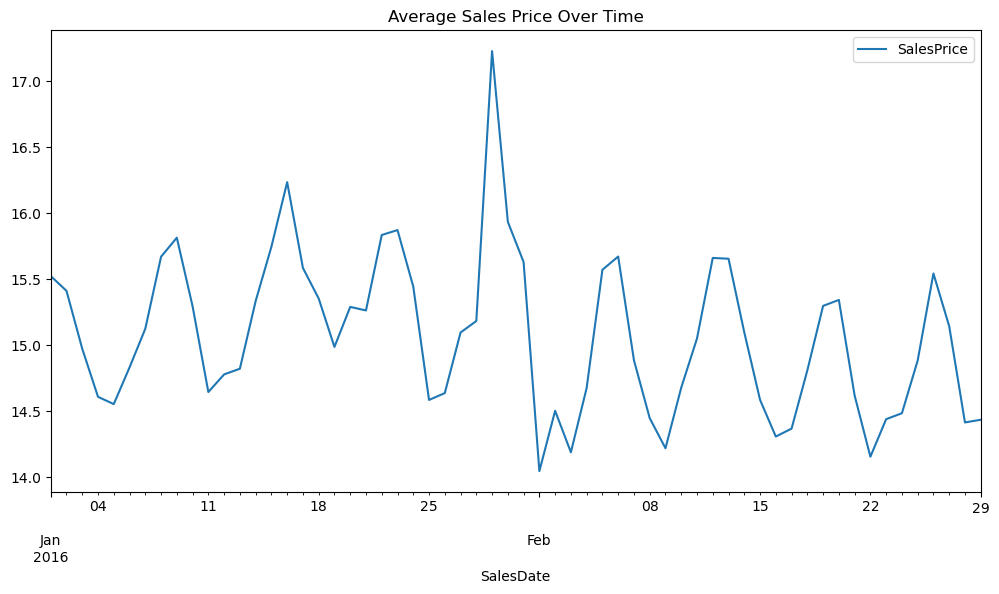

In [12]:
avg_price_trend = sales.groupby('SalesDate').agg({'SalesPrice': 'mean'})
avg_price_trend.plot(figsize=(12, 6), title='Average Sales Price Over Time')

# 3. Purchasing Analysis

In [13]:
vendor_purchase_volume = invoice_purchase.groupby('VendorName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print("Top 10 Vendors by Purchase Volume:\n", vendor_purchase_volume.head(10))

Top 10 Vendors by Purchase Volume:
                              Quantity
VendorName                           
DIAGEO NORTH AMERICA INC      5459788
JIM BEAM BRANDS COMPANY       2737165
MARTIGNETTI COMPANIES         2637275
CONSTELLATION BRANDS INC      2325892
E & J GALLO WINERY            1858260
PERNOD RICARD USA             1647558
BACARDI USA INC               1427075
SAZERAC CO INC                1417727
M S WALKER INC                1372841
ULTRA BEVERAGE COMPANY LLP    1077527


In [14]:
vendor_purchase_cost = purchases.groupby('VendorName').agg({'PurchasePrice': 'sum'}).sort_values(by='PurchasePrice', ascending=False)
print("Top 10 Vendors by Purchase Cost:\n", vendor_purchase_cost.head(10))

Top 10 Vendors by Purchase Cost:
                              PurchasePrice
VendorName                                
DIAGEO NORTH AMERICA INC        3919293.52
JIM BEAM BRANDS COMPANY         2445075.37
PERNOD RICARD USA               2002210.70
MARTIGNETTI COMPANIES           1954748.37
ULTRA BEVERAGE COMPANY LLP      1328577.74
CONSTELLATION BRANDS INC        1316920.86
BACARDI USA INC                 1309369.34
E & J GALLO WINERY              1179960.50
BROWN-FORMAN CORP               1089218.08
M S WALKER INC                   979018.30


In [15]:
# Converting PODate and ReceivingDate columns to datetime
purchases['PODate'] = pd.to_datetime(purchases['PODate'], errors='coerce')
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')

# Checking if there are any null values after conversion
if purchases['PODate'].isnull().any() or purchases['ReceivingDate'].isnull().any():
    print("There are invalid date entries in the dataset. Please review the data.")
else:
    purchases['SupplyDuration'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
    average_supply_duration = purchases['SupplyDuration'].mean()
    print("Average Supply Duration (in days):", average_supply_duration)

C:\Users\pragy\AppData\Local\Temp\ipykernel_10012\3316603117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['PODate'] = pd.to_datetime(purchases['PODate'], errors='coerce')
C:\Users\pragy\AppData\Local\Temp\ipykernel_10012\3316603117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')


Average Supply Duration (in days): 7.620737197630656


C:\Users\pragy\AppData\Local\Temp\ipykernel_10012\3316603117.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['SupplyDuration'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days


In [16]:
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
purchases['PayDate'] = pd.to_datetime(purchases['PayDate'])
purchases['PaymentDuration'] = (purchases['PayDate'] - purchases['InvoiceDate']).dt.days

average_payment_duration = purchases['PaymentDuration'].mean()
print("Average Payment Duration (in days):", average_payment_duration)

C:\Users\pragy\AppData\Local\Temp\ipykernel_10012\3798812609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
C:\Users\pragy\AppData\Local\Temp\ipykernel_10012\3798812609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['PayDate'] = pd.to_datetime(purchases['PayDate'])


Average Payment Duration (in days): 35.658806366863914


C:\Users\pragy\AppData\Local\Temp\ipykernel_10012\3798812609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['PaymentDuration'] = (purchases['PayDate'] - purchases['InvoiceDate']).dt.days


In [17]:
reduced_purchases = purchases[['VendorName', 'PurchasePrice']]
top_vendors = reduced_purchases.groupby('VendorName').sum()['PurchasePrice'].nlargest(10)
print(top_vendors)

VendorName
DIAGEO NORTH AMERICA INC       3919293.52
JIM BEAM BRANDS COMPANY        2445075.37
PERNOD RICARD USA              2002210.70
MARTIGNETTI COMPANIES          1954748.37
ULTRA BEVERAGE COMPANY LLP     1328577.74
CONSTELLATION BRANDS INC       1316920.86
BACARDI USA INC                1309369.34
E & J GALLO WINERY             1179960.50
BROWN-FORMAN CORP              1089218.08
M S WALKER INC                  979018.30
Name: PurchasePrice, dtype: float64


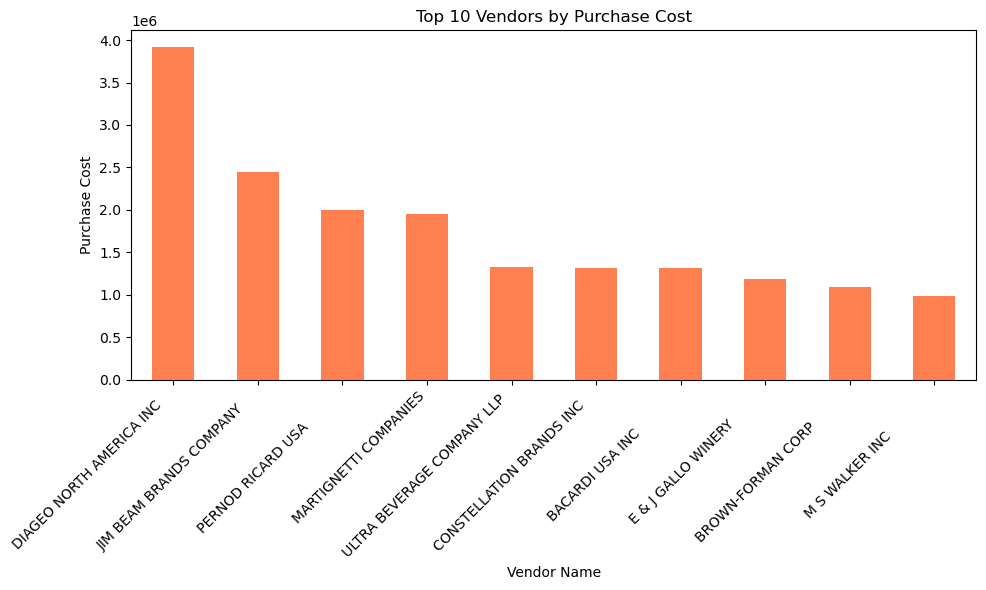

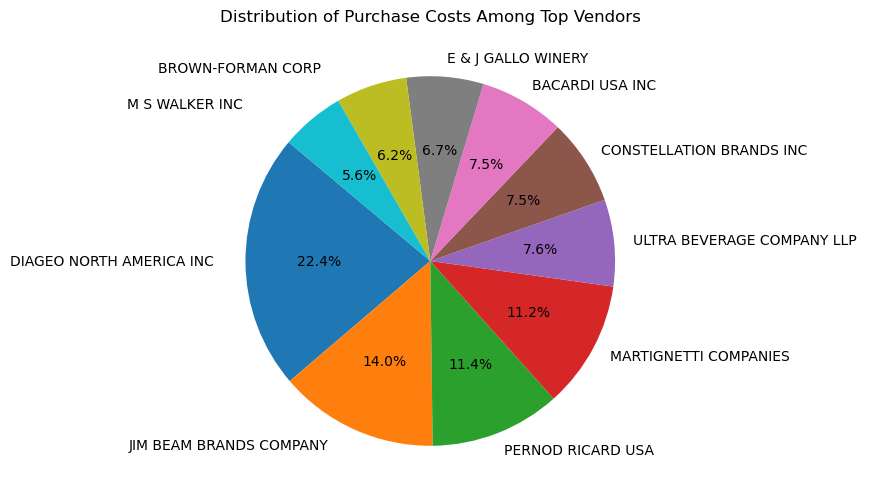

In [18]:
# Bar graph for top vendors by purchase cost
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='bar', color='coral')
plt.title('Top 10 Vendors by Purchase Cost')
plt.ylabel('Purchase Cost')
plt.xlabel('Vendor Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart for distribution of purchase costs among the top vendors
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchase Costs Among Top Vendors')
plt.ylabel('')  # to remove the default 'PurchasePrice' label from the y-axis
plt.show()

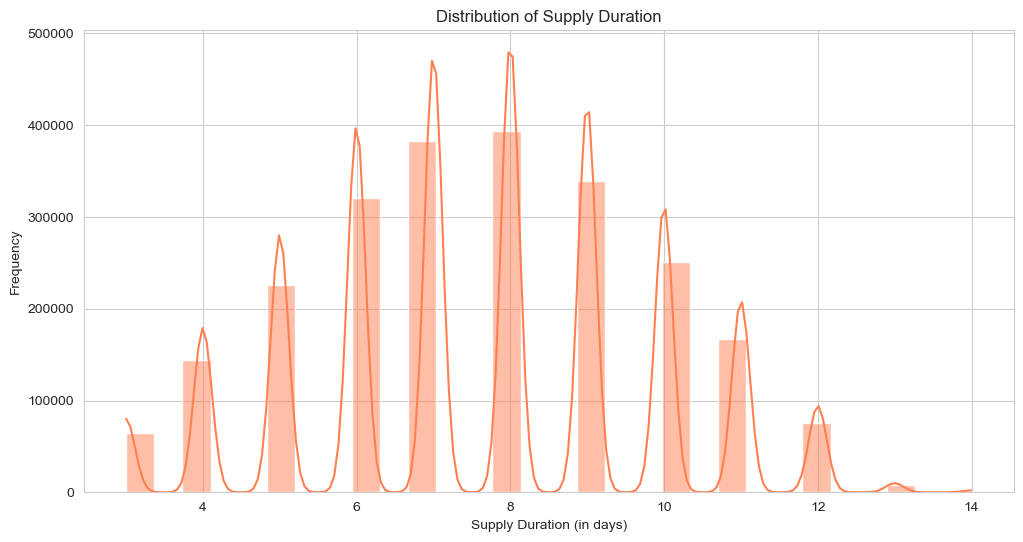

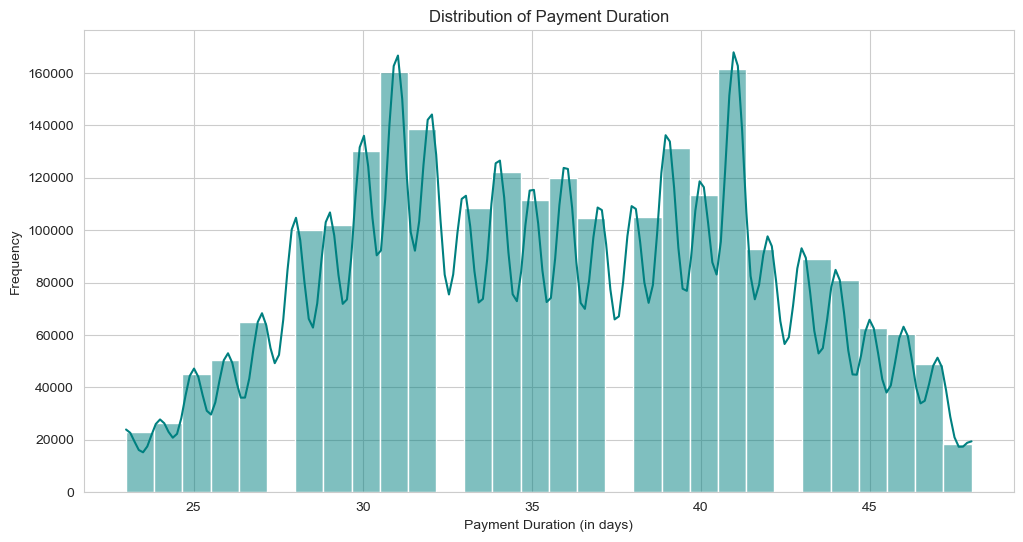

In [19]:
# Style settings
sns.set_style("whitegrid")

# Histogram for Supply Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['SupplyDuration'], kde=True, bins=30, color='coral')
plt.title('Distribution of Supply Duration')
plt.xlabel('Supply Duration (in days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Payment Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['PaymentDuration'], kde=True, bins=30, color='teal')
plt.title('Distribution of Payment Duration')
plt.xlabel('Payment Duration (in days)')
plt.ylabel('Frequency')
plt.show()

In [20]:
start_date = sales['SalesDate'].min()
end_date = sales['SalesDate'].max()
total_days = (end_date - start_date).days

# Calculating Sales Velocity for each product
sales_velocity = sales.groupby(['Brand', 'Description']).agg(Total_Sales=('SalesQuantity', 'sum')).reset_index()
sales_velocity['Sales_Per_Day'] = sales_velocity['Total_Sales'] / total_days

purchases.loc[:, 'Lead_Time'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
lead_times = purchases.groupby(['Brand', 'Description']).agg(Avg_Lead_Time=('Lead_Time', 'mean')).reset_index()

C:\Users\pragy\AppData\Local\Temp\ipykernel_10012\583782622.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases.loc[:, 'Lead_Time'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days


In [21]:
# Merging the data
merged_data = pd.merge(sales_velocity, lead_times, on=['Brand', 'Description'], how='left')

# Calculating Optimal Stock Level
merged_data['Optimal_Stock_Level'] = merged_data['Sales_Per_Day'] * merged_data['Avg_Lead_Time']

# Calculating Safety Stock using maximum sales for each product
max_sales = sales.groupby(['Brand', 'Description']).agg(Max_Daily_Sales=('SalesQuantity', 'max')).reset_index()
merged_data = pd.merge(merged_data, max_sales, on=['Brand', 'Description'], how='left')

merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

In [22]:
# Filtering products where Sales_Per_Day value is greater than Max_Daily_Sales value
problematic_products = merged_data[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales']]

# Getting the number of problematic products
num_problematic_products = len(problematic_products)

# Printing problematic products to the screen
print(f"There are {num_problematic_products} products where the Sales_Per_Day value is greater than the Max_Daily_Sales value.")
if num_problematic_products > 0:
    print(problematic_products[['Brand', 'Description', 'Sales_Per_Day', 'Max_Daily_Sales']])

There are 555 products where the Sales_Per_Day value is greater than the Max_Daily_Sales value.
      Brand                   Description  Sales_Per_Day  Max_Daily_Sales
7        77   Three Olives Espresso Vodka      15.389831                8
8        79      Three Olives Loopy Vodka       7.050847                5
76      273      Sauza Extra Gold Tequila      10.372881                9
139     482              Absolut 80 Proof      37.135593               23
142     497        Capt Morgan Spiced Rum      39.644068               38
...     ...                           ...            ...              ...
7426  44712    Sonoma-Cutrer Chard Sonoma      27.610169               25
7580  46379  Ghost Pine Cab Svgn LMartini      14.474576               12
7590  46447         Gascon Malbec Mendoza      22.796610               16
7592  46458      Layer Cake Barosa Shiraz       7.305085                7
7594  46476          Tilia Malbec Mendoza      26.169492               19

[555 rows x 4 c

In [23]:
# Updating Max_Daily_Sales for problematic products
merged_data.loc[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales'], 'Max_Daily_Sales'] = merged_data['Sales_Per_Day']

# Updating Safety Stock and Recommended Stock Level after modifying Max_Daily_Sales
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

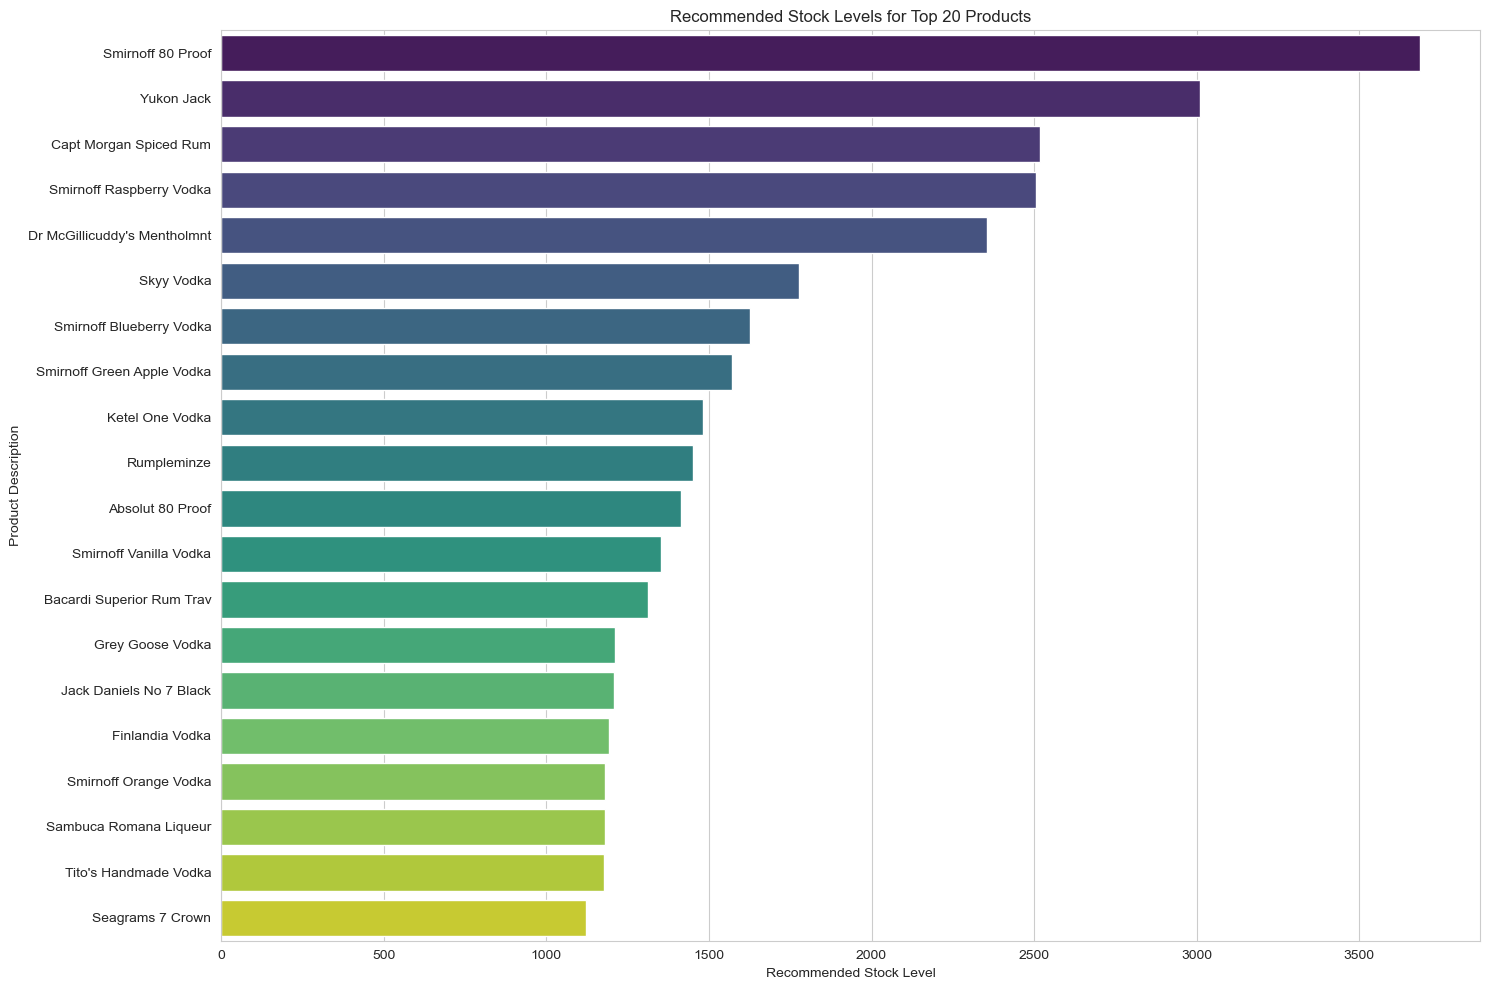

In [24]:
# Sorting the data by Recommended_Stock_Level for better visualization
sorted_data = merged_data.sort_values(by='Recommended_Stock_Level', ascending=False)

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Recommended_Stock_Level', y='Description', data=sorted_data.head(20), palette='viridis')  # showing top 20 products for better visualization
plt.xlabel('Recommended Stock Level')
plt.ylabel('Product Description')
plt.title('Recommended Stock Levels for Top 20 Products')
plt.tight_layout()
plt.show()

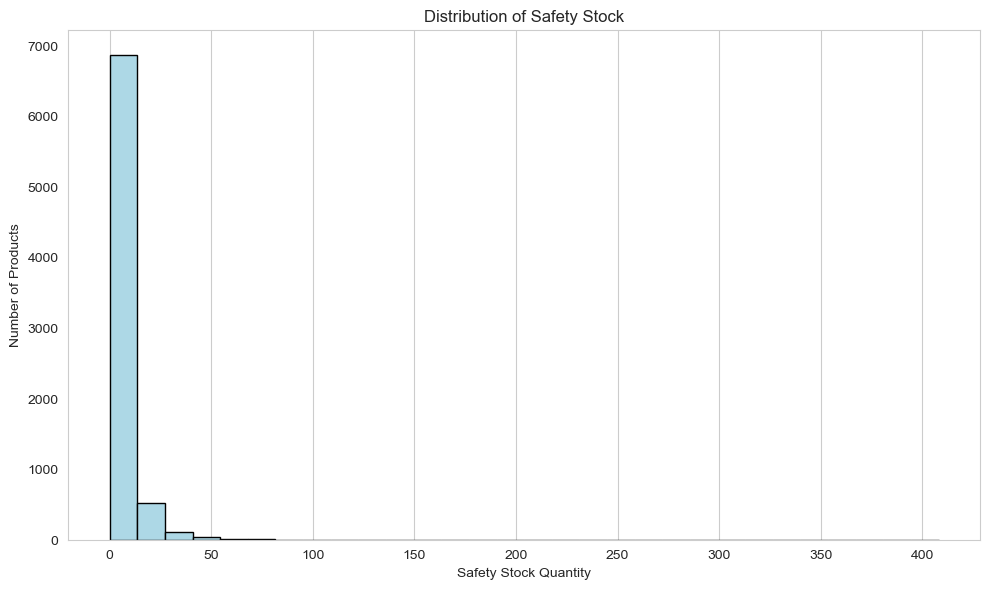

In [25]:
# Plotting the histogram for Safety Stock distribution
plt.figure(figsize=(10,6))
plt.hist(merged_data['Safety_Stock'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Safety Stock')
plt.xlabel('Safety Stock Quantity')
plt.ylabel('Number of Products')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

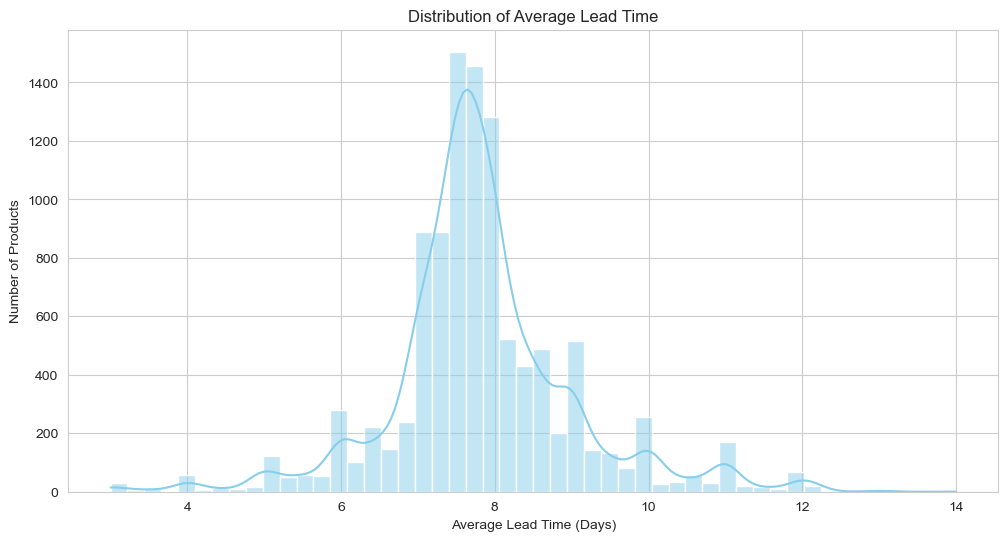

In [26]:
# Styling
sns.set_style("whitegrid")

# Creating the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=lead_times, x='Avg_Lead_Time', bins=50, color='skyblue', kde=True)
plt.title('Distribution of Average Lead Time')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Number of Products')
plt.show()

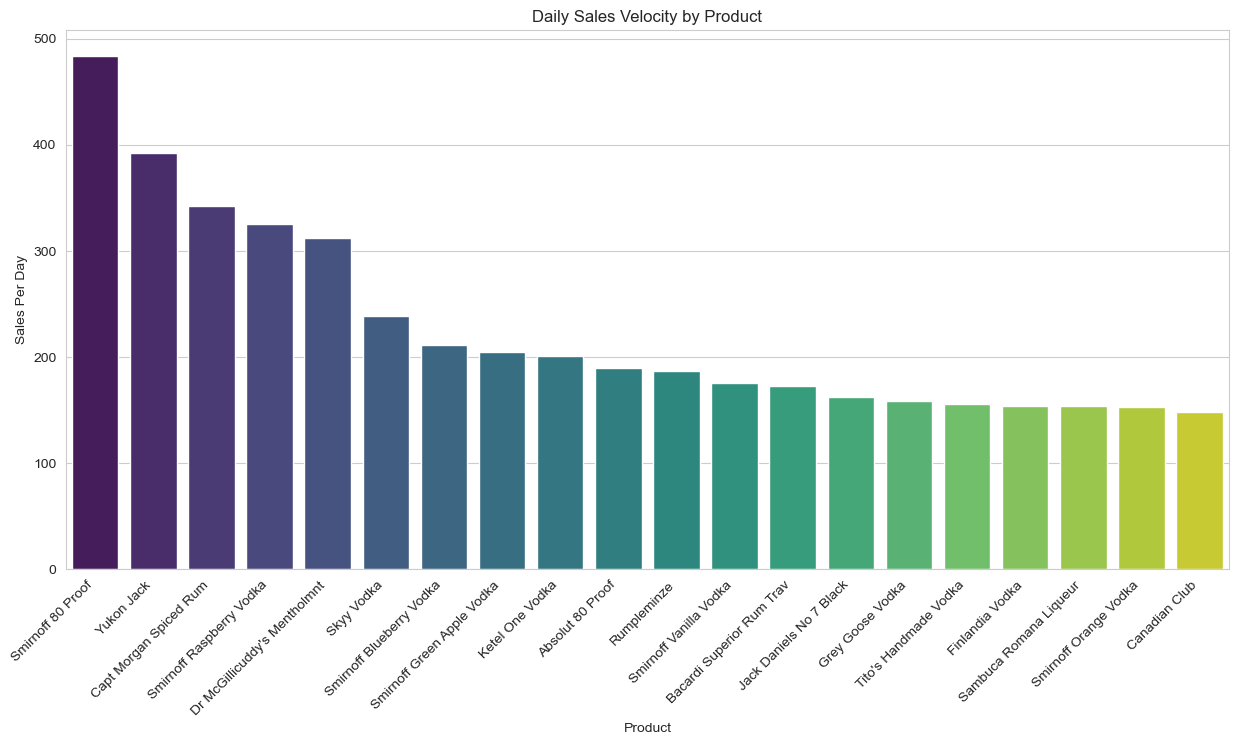

In [27]:
# Sorting the data by Sales_Per_Day in descending order to get top products
top_products = sales_velocity.sort_values(by='Sales_Per_Day', ascending=False).head(20)  # you can adjust the number as needed

# Creating the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Description', y='Sales_Per_Day', data=top_products, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Daily Sales Velocity by Product')
plt.xlabel('Product')
plt.ylabel('Sales Per Day')
plt.show()

In [28]:
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'])
latest_inventory_date = end_inv['endDate'].max()
current_inventory = end_inv[end_inv['endDate'] == latest_inventory_date]

# Summarizing the current stock levels by product.
current_stock_levels = current_inventory.groupby(['Brand', 'Description']).agg(Current_Stock=('onHand', 'sum')).reset_index()

# Merging the current stock levels with the previously calculated data.
final_data = pd.merge(merged_data, current_stock_levels, on=['Brand', 'Description'], how='left')

# Assume zero current stock for any products not present in the current inventory.
final_data['Current_Stock'] = final_data['Current_Stock'].fillna(0)

      Brand                   Description  Current_Stock  \
0        58   Gekkeikan Black & Gold Sake          385.0   
1        60        Canadian Club 1858 VAP          146.0   
2        61         Margaritaville Silver           12.0   
3        62      Herradura Silver Tequila          459.0   
4        63    Herradura Reposado Tequila          442.0   
...     ...                           ...            ...   
7653  90084  Les Fiefs Lagrange St Jul 11            2.0   
7654  90085  Ch Lilian 09 Ladouys St Este            6.0   
7655  90086  La Dame Montrose St Estep 11           32.0   
7656  90087  Ch Mouton Rothschild 12 Paui           45.0   
7657  90089    Ch Lynch Bages 12 Pauillac          124.0   

      Recommended_Stock_Level  Order_Quantity  
0                   39.990104        0.000000  
1                   16.996855        0.000000  
2                   14.894394        2.894394  
3                   20.384988        0.000000  
4                   18.042373        0.

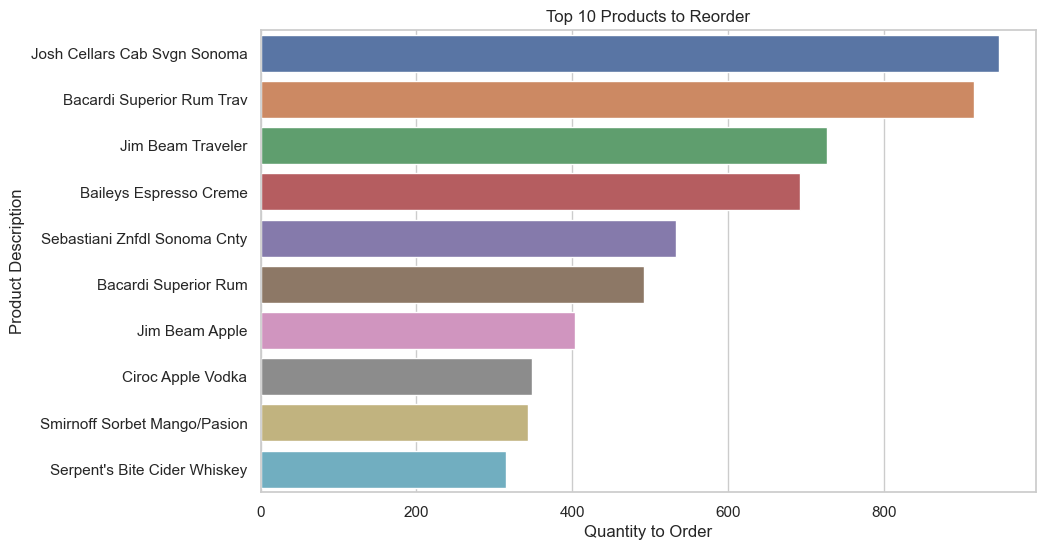

In [29]:
# Calculating how much of each product needs to be ordered if current stock is below recommended levels.
final_data['Order_Quantity'] = final_data['Recommended_Stock_Level'] - final_data['Current_Stock']
final_data['Order_Quantity'] = final_data['Order_Quantity'].clip(lower=0)  # Setting negative order quantities to zero.

# Reporting the results.
print(final_data[['Brand', 'Description', 'Current_Stock', 'Recommended_Stock_Level', 'Order_Quantity']])


# Creating a graph using Seaborn.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Quantity', y='Description', data=final_data.sort_values('Order_Quantity', ascending=False).head(10))
plt.title('Top 10 Products to Reorder')
plt.xlabel('Quantity to Order')
plt.ylabel('Product Description')
plt.show()

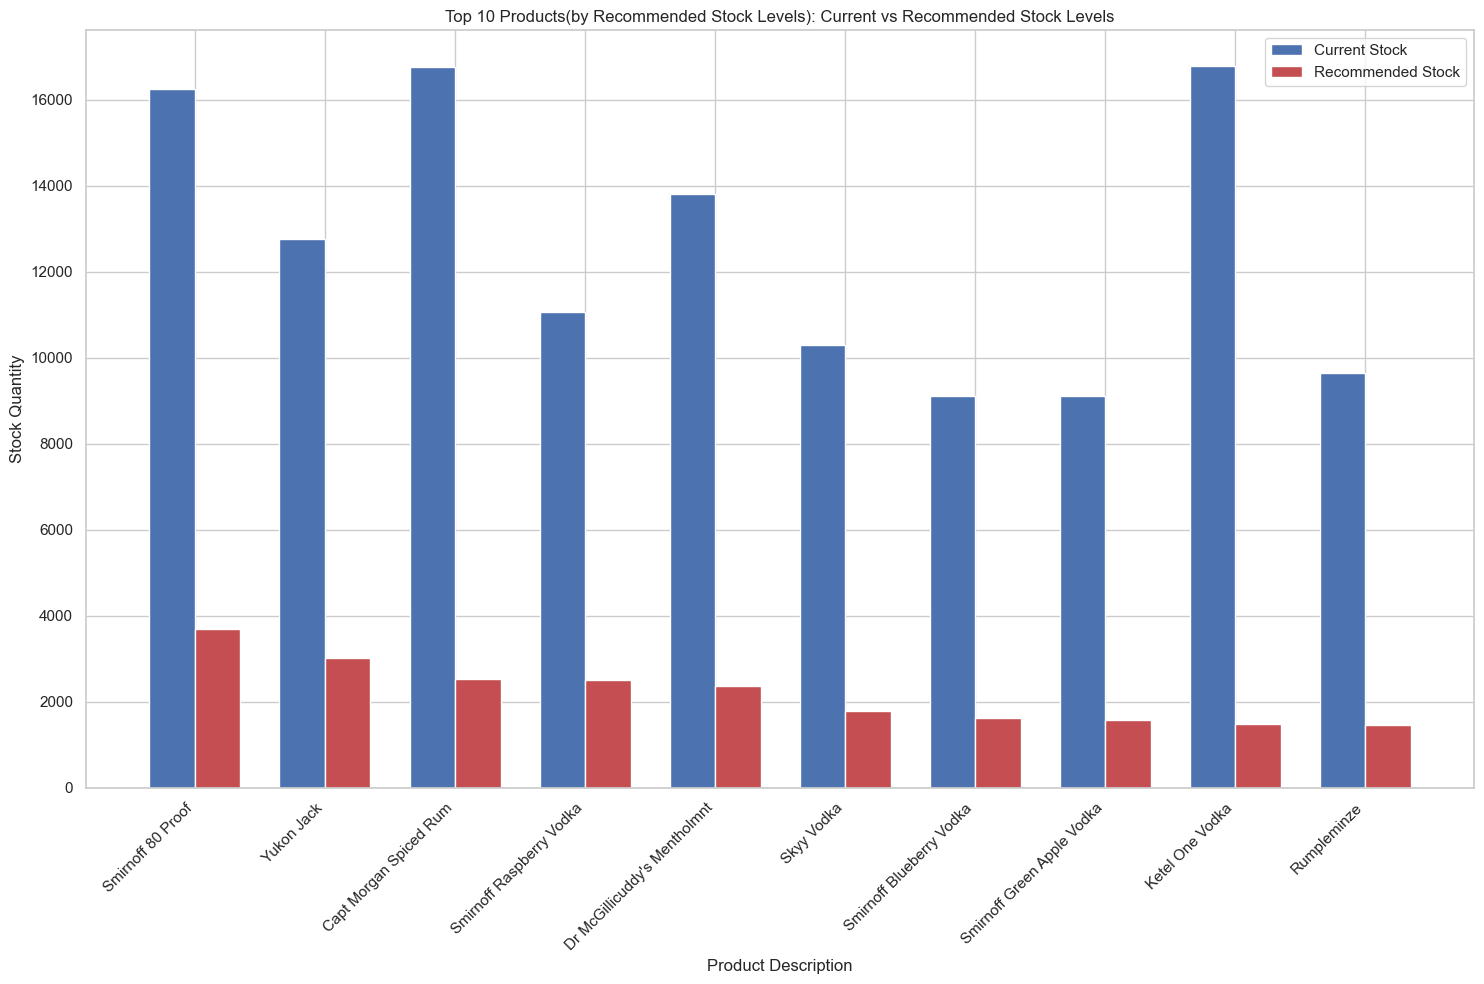

In [30]:
#Sorting the products by recommended stock level
sorted_data = final_data.sort_values(by='Recommended_Stock_Level', ascending=False).head(10)  # To show the top 10 products

# Creating a double-column bar chart
bar_width = 0.35
index = np.arange(len(sorted_data))

plt.figure(figsize=(15, 10))
bar1 = plt.bar(index, sorted_data['Current_Stock'], bar_width, label='Current Stock', color='b')
bar2 = plt.bar([i + bar_width for i in index], sorted_data['Recommended_Stock_Level'], bar_width, label='Recommended Stock', color='r')

# Setting the labels and title
plt.xlabel('Product Description')
plt.ylabel('Stock Quantity')
plt.title('Top 10 Products(by Recommended Stock Levels): Current vs Recommended Stock Levels')
plt.xticks([i + bar_width / 2 for i in index], sorted_data['Description'], rotation=45, ha='right')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

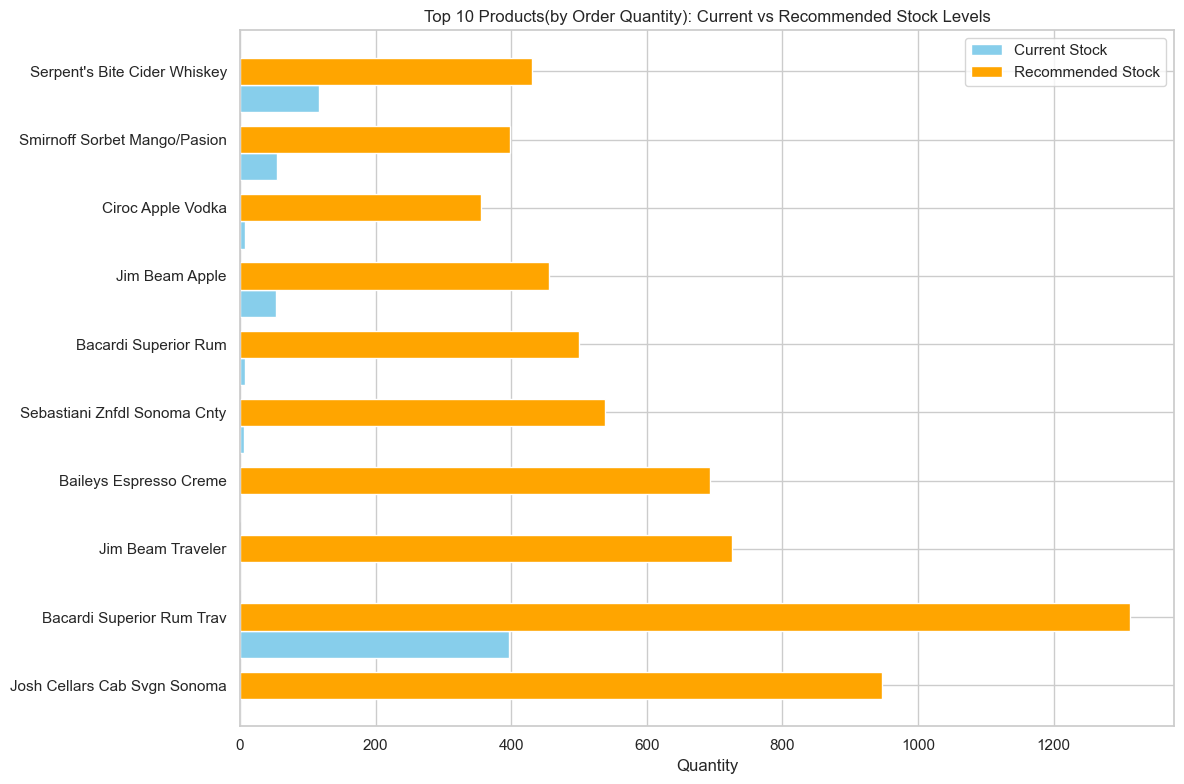

In [31]:
# Filtering the data to show the top 10 products where the ordering quantity is highest
top_products_to_order = final_data.nlargest(10, 'Order_Quantity')

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 8))

# Indexing for the bars
ind = np.arange(len(top_products_to_order))

# Width of the bars
bar_width = 0.4
# Plotting current stock and recommended stock side by side
ax.barh(ind, top_products_to_order['Current_Stock'], bar_width, color='skyblue', label='Current Stock')
ax.barh([i + bar_width for i in ind], top_products_to_order['Recommended_Stock_Level'], bar_width, color='orange', label='Recommended Stock')

# Setting the y-axis labels to product descriptions
ax.set(yticks=[i + bar_width for i in ind], yticklabels=top_products_to_order['Description'], ylim=[2 * bar_width - 1, len(ind)])

# Adding the legend
ax.legend()
# Adding labels and title
ax.set_xlabel('Quantity')
ax.set_title('Top 10 Products(by Order Quantity): Current vs Recommended Stock Levels')

# Display the plot
plt.tight_layout()
plt.show()

## Conclusion:

The meticulous analyses conducted across inventory, sales, and purchasing aspects will yield valuable insights. These insights will form the basis for actionable recommendations to enhance inventory management efficiency and sustainability. The overarching goal is to reduce costs, prevent overstocking, and minimize waste, contributing to a more streamlined and environmentally conscious approach to inventory management.